In [51]:
import pandas as pd
import MarineDNA as md
import plotly.express as px
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [15]:
file1 = "../../../Data/merged_data/no_duplicates/Merged2018_16S_otu_filtered.tsv"
file2 = "../../../Data/merged_data/no_duplicates/Merged2018_18S_otu_filtered.tsv"
asvs_16S = pd.read_csv(file1, index_col=0, sep="\t")
asvs_18S = pd.read_csv(file2, index_col=0, sep="\t")

In [30]:
# one random draw
ran_lo_16S = md.ranRelPct(asvs_16S)
ran_lo_18S = md.ranRelPct(asvs_18S)
ran_lo_16S

ASV ID,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,-2.378413,-3.369011,-3.785973,-4.018545,-3.854298,-4.957980,-11.207407,-4.142199,-3.529455,-4.068907,...,-9.014709,-8.410203,-9.772417,-12.996136,-9.247176,-12.742194,-11.830134,-11.248812,-10.294835,-9.188598
CN18Fc19_5_eDNA,-1.587599,-3.098862,-2.976983,-3.134390,-3.150967,-4.523760,-5.291080,-4.249724,-4.048346,-3.790040,...,-11.048005,-10.683545,-12.878937,-11.633353,-9.780870,-10.800591,-11.615101,-11.474808,-11.415205,-9.869198
CN18Fc21_6_eDNA,-1.887255,-3.102123,-3.234806,-3.242718,-3.603849,-4.334532,-4.635524,-3.997826,-3.720854,-3.926365,...,-10.387803,-11.427691,-10.615036,-10.932742,-11.182335,-12.114738,-13.273016,-13.633329,-18.520559,-12.335467
CN18Fc22_6_eDNA,-1.704653,-3.251212,-3.178024,-3.168909,-3.341454,-4.591858,-5.008526,-4.216495,-3.973574,-4.051521,...,-11.195165,-11.193358,-11.042665,-11.905558,-12.885949,-11.138985,-12.811245,-9.896409,-12.023891,-10.824480
CN18Fc24_6_eDNA,-1.880794,-3.444575,-3.098435,-3.126092,-3.358328,-4.329323,-5.129402,-4.122507,-3.814556,-4.184728,...,-13.512908,-10.166657,-10.405370,-10.314484,-8.981388,-13.930453,-10.387630,-12.182197,-11.134392,-11.988887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN18SESPkoa_SC42,-3.035495,-1.616085,-6.886600,-5.876543,-6.643857,-4.547136,-3.044867,-5.715603,-6.247619,-5.288427,...,-9.935985,-13.283564,-10.493476,-11.582430,-9.585490,-10.698694,-11.767815,-11.375412,-11.692256,-13.958600
CN18SESPkoa_SC44,-6.102613,-4.499137,-4.843580,-5.091624,-4.967108,-3.228550,-8.519800,-3.478708,-5.648037,-11.481353,...,-9.630980,-9.905503,-10.953949,-10.598331,-8.736200,-9.085089,-11.280933,-10.988160,-9.263342,-8.751608
CN18SESPkoa_SC45,-3.224491,-1.630342,-7.387682,-6.132497,-6.683227,-4.933105,-2.841109,-6.209303,-6.394166,-5.826867,...,-11.573902,-15.695320,-11.221712,-11.333059,-13.457073,-11.253673,-9.895053,-10.616310,-11.720490,-10.863420
CN18SESPkoa_SC47,-3.443543,-1.714866,-7.784885,-6.118163,-6.688243,-5.163195,-3.160888,-6.467150,-6.759575,-5.657093,...,-10.598968,-9.917348,-11.651373,-11.433969,-9.753111,-10.879285,-13.230673,-11.760083,-11.661451,-12.189107


In [26]:
# Hierarchical clustering of random log-odds draw
labels_16S = md.doClustering(ran_lo_16S, 3)
labels_18S = md.doClustering(ran_lo_18S, 3)
print(labels_16S)
print()
print(pd.DataFrame(np.array(np.unique(labels_16S, return_counts=True)).T))

['0' '2' '2' '2' '2' '2' '0' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '1' '1' '1']

   0   1
0  0   9
1  1  13
2  2  40


In [27]:
pca_results_16S = md.doPCA(ran_lo_16S)
pca_results_18S = md.doPCA(ran_lo_18S)
pca_results_16S["scores"]

array([[ 25.49206111,  84.7137536 , -34.34206551, ...,  -1.23307698,
         -2.79409959,   0.57920196],
       [-18.42153145,   5.65873184,  -6.82379606, ...,  18.91988693,
          2.19003517,   1.3429332 ],
       [-27.34574716,  -9.25383474, -10.2173538 , ..., -11.57300254,
         10.68442746,  -9.79228245],
       ...,
       [ 68.0484502 , -17.11920111,  -8.16647394, ...,  -8.99971874,
          7.85592597,  -2.64452975],
       [ 71.59755892, -20.91048739, -10.14987516, ...,   1.70100373,
         -7.08411702,   3.30721575],
       [ 70.76914261, -20.65094749,  -5.07924005, ...,  -0.38237725,
          1.53239329,  -5.3677356 ]])

### Visualizing PCAs

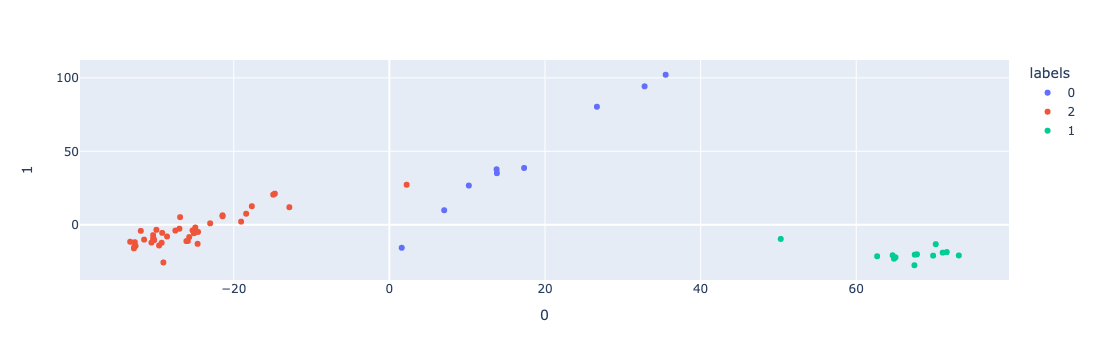

In [31]:
# 16S
scores_16S = pd.DataFrame(md.doPCA(ran_lo_16S)["scores"])
scores_16S["labels"] = labels
fig_16S = px.scatter(
    scores_16S,
    x = 0,
    y = 1,
    color = "labels"
)
fig_16S.show()

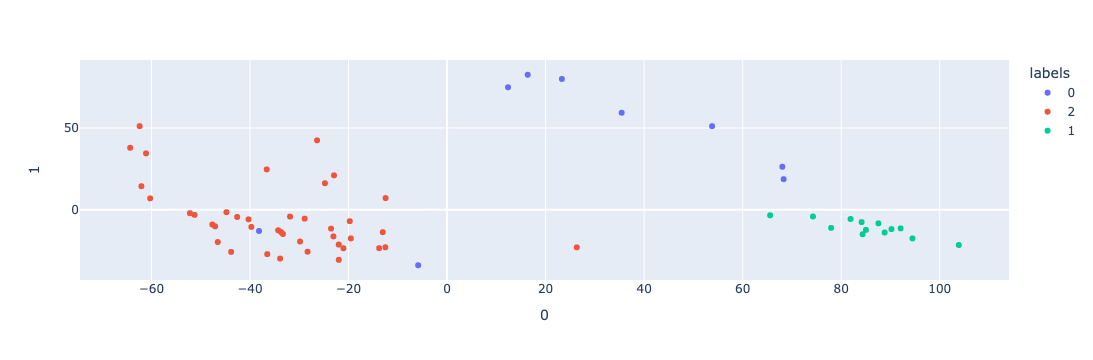

In [32]:
# 18S
scores_18S = pd.DataFrame(md.doPCA(ran_lo_18S)["scores"])
scores_18S["labels"] = labels
fig_18S = px.scatter(
    scores_18S,
    x = 0,
    y = 1,
    color = "labels"
)
fig_18S.show()

### Run sampleClust function n_rep times to assign n_clust clusters

In [33]:
n_clust = 8
n_rep = 10
 
cluster_samples_16S = [md.doClustering(md.ranRelPct(asvs_16S), n_clust) for i in range(n_rep)]
cluster_samples_16S = pd.DataFrame(cluster_samples_16S).transpose()
cluster_samples_16S

,0,1,2,3,4,5,6,7,8,9
0,7,7,3,3,3,3,3,3,7,3
1,1,5,2,0,2,5,0,2,1,0
2,2,5,0,0,2,6,2,2,3,5
3,2,5,2,0,2,6,2,2,1,5
4,2,5,2,0,2,6,2,2,3,5
...,...,...,...,...,...,...,...,...,...,...
57,4,0,1,1,1,1,1,1,0,1
58,7,7,3,3,3,3,3,3,7,3
59,4,0,1,1,1,1,1,1,0,1
60,4,0,1,1,1,1,1,1,0,1


In [34]:
n_clust = 8
n_rep = 10
 
cluster_samples_18S = [md.doClustering(md.ranRelPct(asvs_18S), n_clust) for i in range(n_rep)]
cluster_samples_18S = pd.DataFrame(cluster_samples_18S).transpose()
cluster_samples_18S

,0,1,2,3,4,5,6,7,8,9
0,0,2,4,4,1,2,1,4,4,1
1,3,7,4,4,1,7,4,4,4,1
2,0,7,4,4,1,7,4,4,4,1
3,3,7,4,4,1,7,4,4,4,1
4,3,7,4,4,1,7,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...
57,4,0,0,5,0,0,0,0,5,2
58,2,3,2,2,3,1,5,5,2,5
59,4,0,0,5,0,0,0,0,5,2
60,4,0,0,5,0,0,0,0,5,2


In [39]:
# A function to test if row pws[0] is the same cluster as row pws[1] in column 'col'
def isSameCluster(pws, df, col):
    return df.iloc[pws[0], col] == df.iloc[pws[1], col]

print(isSameCluster((1, 3), cluster_samples_16S, 0))
print(isSameCluster((0, 3), cluster_samples_16S, 0))

False
False


### Code to test if each pair of rows ((n^2 - 1)/2) = 1891) are the same for all columns

In [35]:
import itertools

In [40]:
pws_rows_16S = itertools.combinations(range(cluster_samples_16S.shape[0]), 2)

pws_same_16S = pd.DataFrame([[isSameCluster(pair, cluster_samples_16S, col) for col in range(cluster_samples_16S.shape[1])] for pair in pws_rows_16S])
pws_same_16S

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1886,False,False,False,False,False,False,False,False,False,False
1887,False,False,False,False,False,False,False,False,False,False
1888,True,True,True,True,True,True,True,True,True,True
1889,True,True,True,True,True,True,True,True,True,True


In [41]:
pws_rows_18S = itertools.combinations(range(cluster_samples_18S.shape[0]), 2)

pws_same_18S = pd.DataFrame([[isSameCluster(pair, cluster_samples_18S, col) for col in range(cluster_samples_18S.shape[1])] for pair in pws_rows_18S])
pws_same_18S

,0,1,2,3,4,5,6,7,8,9
0,False,False,True,True,True,False,False,True,True,True
1,True,False,True,True,True,False,False,True,True,True
2,False,False,True,True,True,False,False,True,True,True
3,False,False,True,True,True,False,False,True,True,True
4,False,False,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1886,False,False,False,False,False,False,False,False,False,False
1887,False,False,False,False,False,False,False,False,False,False
1888,True,True,True,True,True,True,True,True,True,True
1889,True,True,True,True,True,True,True,True,True,True


In [42]:
# Function to return maximum number of values that are the same in a each row
def maxSame(row):
    return row.value_counts().max()

print(maxSame(pws_same_16S.iloc[0, :]))
print(maxSame(pws_same_16S.iloc[1890, :]))

10
10


In [44]:
# Code to return the percent of all values that were the same by row
num_same = [maxSame(pws_same_18S.iloc[row, :]) for row in range(pws_same_18S.shape[0])]
np.sum(num_same) * 100 / (pws_same_18S.shape[0] * pws_same_18S.shape[1])

97.04389212057113

## Putting it all together

In [45]:
# Function to create n_rep draws of df and assign n_clusters and returns percent of draws that had same relative cluster assignments
def pctSame(df, n_clust, n_rep):
    if n_clust >= df.shape[0]:
        return 100
    
    def isSameCluster(pws, df, col):
        return df.iloc[pws[0], col] == df.iloc[pws[1], col]
    
    def maxSame(row):
        return row.value_counts().max()
    
    # cluster a random sample of logit(relative percentages)
    cluster_samples = [md.doClustering(md.ranRelPct(df), n_clust) for i in range(n_rep)]
    cluster_samples = pd.DataFrame(cluster_samples).transpose()
    # unique pairs of rows
    pws_rows = itertools.combinations(range(cluster_samples.shape[0]), 2)
    # identify pairs of samples that are in the same cluster (True) or in different clusters (False)
    pws_same = pd.DataFrame([[isSameCluster(pair, cluster_samples, col) for col in range(cluster_samples.shape[1])] for pair in pws_rows])
    # get the maximum number replicates that have the same value (True or False) for each sample
    num_same = [maxSame(pws_same.iloc[row, :]) for row in range(pws_same.shape[0])]
    # convert to percentage with maximum of same value across all replicates
    return np.sum(num_same) * 100 / (pws_same.shape[0] * pws_same.shape[1])

In [ ]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 50
num_clust_16S = np.arange(2, asvs_16S.shape[1] + 1)
pct_same_16S = [pctSame(asvs_16S, x, n_rep) for x in num_clust_16S]

In [48]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 50
num_clust_18S = np.arange(2, asvs_18S.shape[1] + 1)
pct_same_18S = [pctSame(asvs_18S, x, n_rep) for x in num_clust_18S]

CPU times: user 7min 6s, sys: 47.5 ms, total: 7min 6s
Wall time: 7min 6s


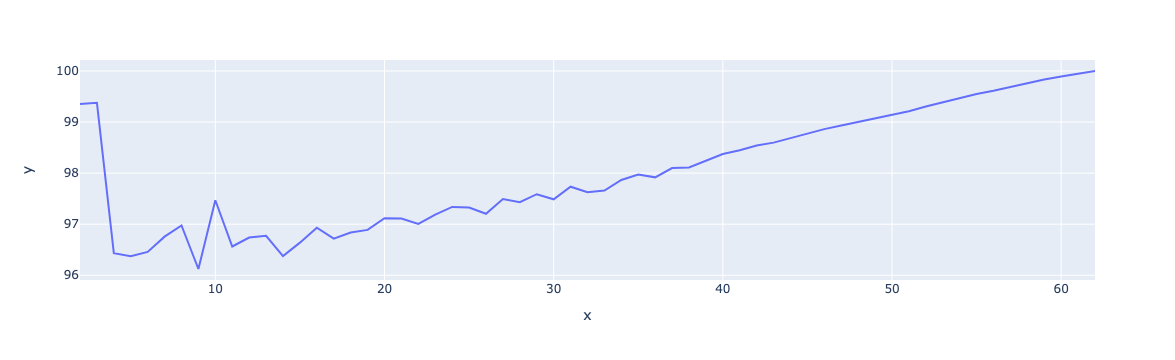

In [49]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_18S, y = pct_same_18S)

In [ ]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_16S, y = pct_same_16S)